In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [108]:
x= np.random.rand(200,1) *6 -3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200, 1) # random noise add kia hu 

# y = 0.8x^2 + 0.9x + 2

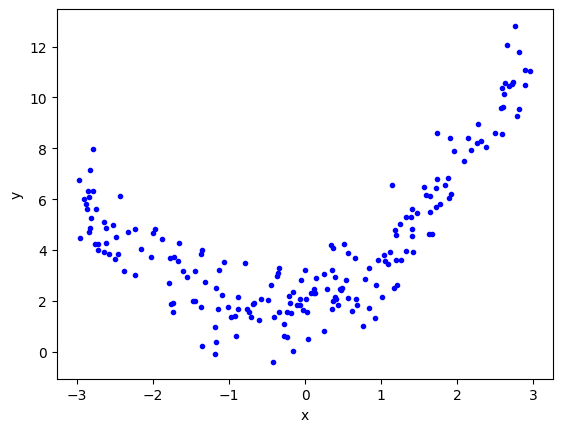

In [109]:
plt.plot(x, y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2 , random_state =2)

In [111]:
lr =LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [112]:
y_pred = lr.predict(x_test)

In [113]:
r2_score(y_test, y_pred)

0.015987257869340077

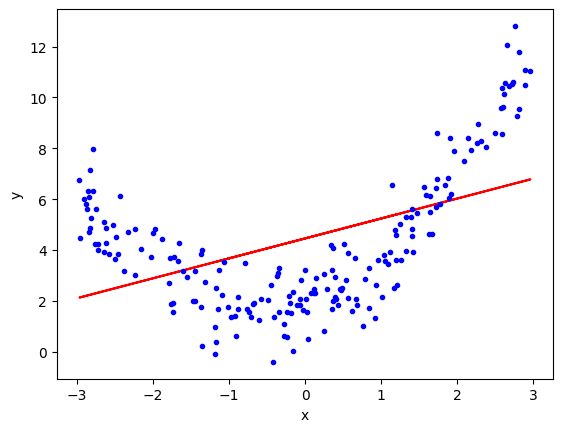

In [114]:
plt.plot(x_train,lr.predict(x_train),color='red')
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Now applying **POlynomial Regression**
and observing the changes and variations including **bias variance**



In [115]:
poly= PolynomialFeatures( degree =2, include_bias =True)

x_train_tr = poly.fit_transform(x_train)
x_test_tr = poly.transform(x_test)

In [116]:
print(x_train[0])
print(x_train_tr[0])

[-1.14789493]
[ 1.         -1.14789493  1.31766277]


In [117]:
lr = LinearRegression()
lr.fit(x_train_tr,y_train)

LinearRegression()

In [118]:
y_pred = lr.predict(x_test_tr)


In [119]:
r2_score(y_test,y_pred)

0.7831853682240444

In [120]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.97141843 0.78385468]]
[2.07987514]


In [121]:
x_new = np.linspace(-3,3 ,200).reshape(200,1)
x_new_poly =poly.transform(x_new)
y_new = lr.predict(x_new_poly)

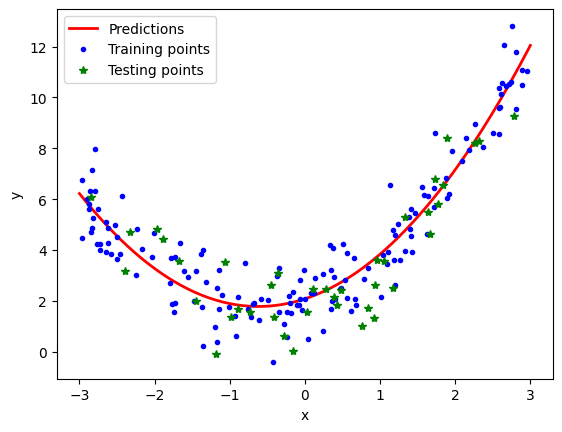

In [122]:
plt.plot(x_new, y_new, "red",linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g*",label='Testing points')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Let's generate a function 'poly' for generating polynomial functions for regression models for any input value of degree

In [123]:
def poly_lr(deg):
    x_new = np.linspace(-3, 3 ,100).reshape(100,1)
    x_new_poly =poly.transform(x_new)

    
    pol = PolynomialFeatures(degree = deg, include_bias= True)
    ss= StandardScaler()
    lr= LinearRegression()

    poly_lr= Pipeline([
        ("poly_features", pol),
        ("Standard Scaler",ss),
        ("Linear Regression",lr),
        
    ])


    poly_lr.fit(x,y)
    y_new_pred = poly_lr.predict(x_new)
    plt.plot(x_new, y_new_pred,'red', label="Degree "+ str(degree), linewidth =2)


    plt.plot(x_train, y_train, "b.", linewidth=2)
    plt.plot(x_test, y_test, "g*", linewidth=2)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()
    

In [124]:
poly_lr(350)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1066: RuntimeWarning: overflow encountered in square
  temp **= 2
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


NameError: name 'degree' is not defined